In [1]:
#libraries

import tensorflow as tf
import tensorflow_quantum as tfq
import cirq
import sympy
import numpy as np
#import seaborn as sns
import collections

# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit

2023-07-10 22:29:47.662781: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-10 22:29:47.662803: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-07-10 22:29:53.871047: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-07-10 22:29:53.871072: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-07-10 22:29:53.871093: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (giulio-HP-250-G7-Notebook-PC): /proc/driver/nvidia/version does not exist
2023-07-10 22:29:53.871792: I tensorflow/core/pl

# QCNN : Different QFCC plot

## import the data

In [2]:
# 3 qbit fcc
loss_3 = np.loadtxt("3loss.txt")
val_loss_3 = np.loadtxt("3val_loss.txt")
val_accuracy_3 = np.loadtxt("3val_acc.txt")

# general n qubits fcc
loss_n = np.loadtxt("nloss.txt")
val_loss_n = np.loadtxt("nval_loss.txt")
val_accuracy_n = np.loadtxt("nval_acc.txt")

# 2 fcc
loss_2 = np.loadtxt("2loss.txt")
val_loss_2 = np.loadtxt("2val_loss.txt")
val_accuracy_2 = np.loadtxt("2val_acc.txt")

# 11 fcc
loss_11 = np.loadtxt("11loss.txt")
val_loss_11 = np.loadtxt("11val_loss.txt")
val_accuracy_11 = np.loadtxt("11val_acc.txt")

# 12 fcc 
loss_12 = np.loadtxt("12loss.txt")
val_loss_12 = np.loadtxt("12val_loss.txt")
val_accuracy_12 = np.loadtxt("12val_acc.txt")

# mean value of the last 20 epochs: where we verified the convergence
mean_accuracy_3 = np.mean(val_accuracy_3[30:])
mean_accuracy_n = np.mean(val_accuracy_n[30:])
mean_accuracy_2 = np.mean(val_accuracy_2[30:])
mean_accuracy_11 = np.mean(val_accuracy_11[30:])
mean_accuracy_12 = np.mean(val_accuracy_12[30:])



## Plot

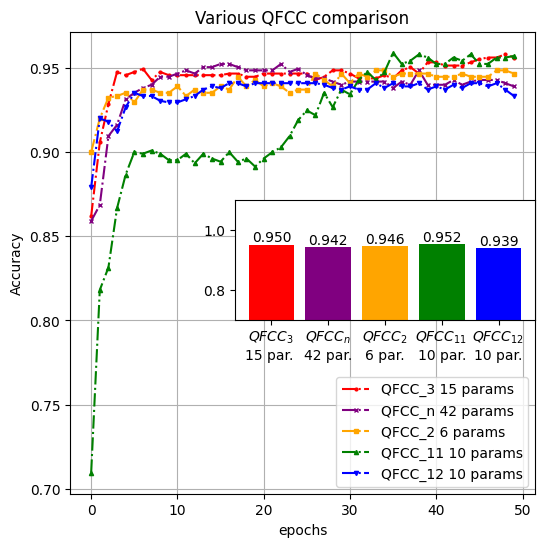

In [23]:
fig, axLL = plt.subplots(1, 1 , figsize=(6, 6))


axLL.plot(val_accuracy_3,"-.", marker= "o", markersize=2, label = "QFCC_3 15 params", color="red")
axLL.plot(val_accuracy_n,"-.", marker= "x", markersize=3, label = "QFCC_n 42 params", color="purple")
axLL.plot(val_accuracy_2,"-.", marker= "s", markersize=3, label = "QFCC_2 6 params", color="orange")
axLL.plot(val_accuracy_11,"-.", marker= "^", markersize=3, label = "QFCC_11 10 params", color="green")
axLL.plot(val_accuracy_12,"-.", marker= "v", markersize=3, label = "QFCC_12 10 params", color="blue")

axLL.set_xlabel("epochs")
axLL.set_ylabel("Accuracy")
axLL.legend(loc = 'best')
axLL.set_title("Various QFCC comparison")
#axLL.set_ylim(-5.7,-5.1)
#plt.ylim(-0.2,0.1)
axLL.grid(True, which= "both")
l, b, h, w = .4, .4, .2, .5
ax3 = fig.add_axes([l, b, w, h])
plt.ylim(0.7, 1.1)
x = ["$QFCC_{3}$ \n15 par. ", "$QFCC_{n}$ \n42 par.", "$QFCC_{2}$ \n6 par.", "$QFCC_{11}$ \n10 par.", "$QFCC_{12}$ \n10 par."]
y = [mean_accuracy_3, mean_accuracy_n, mean_accuracy_2, mean_accuracy_11, mean_accuracy_12]
plt.bar(x,y, color=("red", "purple", "orange", "green", "blue"))
# Adding labels to each bar

for i in range(len(x)):
    plt.text(x[i], y[i], '{:.3f}'.format(y[i]), ha='center', va='bottom')

In [11]:
plt.plot(loss_n, label='Training')
plt.plot(val_loss_n, label='Validation')
plt.set_title('Training QFCC with 42 params')
plt.set_xlabel('Epochs')
plt.set_ylabel('Loss')
plt.grid(True, which= "both")
plt.legend()
plt.show()

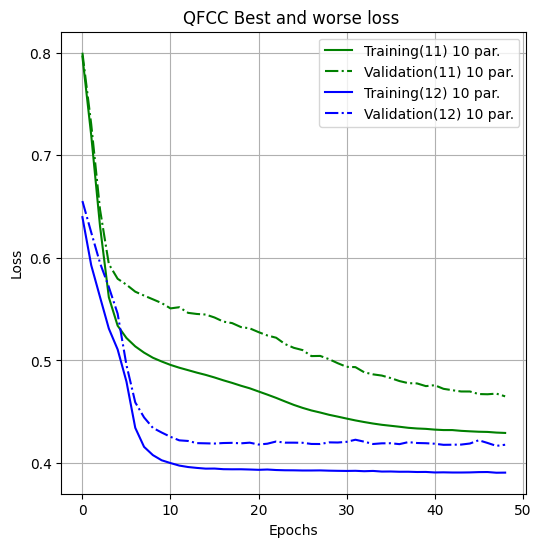

In [4]:
plt.figure(figsize=(6, 6))
#plt.plot(loss_n, label='Training 42 par.', color="purple")
#plt.plot(val_loss_n,"-.", label='Validation 42 par.', color="purple")

#plt.plot(loss_3, label='Training 15 par.', color="red")
#plt.plot(val_loss_3,"-.", label='Training 15 par.', color="red")

plt.plot(loss_11, label='Training(11) 10 par.', color="green")
plt.plot(val_loss_11,"-.", label='Validation(11) 10 par.', color="green")

plt.plot(loss_12, label='Training(12) 10 par.', color="blue")
plt.plot(val_loss_12,"-.", label='Validation(12) 10 par.', color="blue")

#plt.plot(loss_2, label='Training 6 par.', color="orange")
#plt.plot(val_loss_2,"-.", label='Validation 6 par.', color="orange")

plt.title('QFCC Best and worse loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True, which= "both")
plt.legend()

plt.show()